# Fig 1c. Comparative performance of deep learning models on whole genome evaluation at different evaluation thresholds. For each model we show the averaged performance across ENCODE cell lines and across patient data.

NB! This plot is currently showing average per sample Pearson as in [evaluation paper](https://www.nature.com/articles/s42256-022-00570-9/figures/2)
We can change to filtering by sample, flattened pearson on dataset by just recalculating pearson different subsets (this is just annoying because slower).


TODO:
- refactor notebook (Liine)
- mean across ENCODE
- add TCGA predictions
- other models

In [14]:
import numpy as np
from tqdm import tqdm
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

from notebooks.utils import get_ys_from_npzs


def get_accuracy(pred_file, true_file) -> tuple[np.ndarray, np.ndarray]:
    pred_y, true_y = get_ys_from_npzs(npz_files=[pred_file, true_file], normalize=False)

    by_sample_r = []
    for y1, y2 in tqdm(zip(true_y, pred_y), total=len(true_y)):
        by_sample_r.append(pearsonr(y1, y2)[0])
    return np.array(by_sample_r), true_y


sample_wise_r, true_t = get_accuracy('../data/generated/predictions/evalwg_GM12878sp_dCNN_fig1.npz',
                                     '../data/generated/predictions/evalwg_GM12878sp.npz')

{'../data/generated/predictions/evalwg_GM12878sp_dCNN_fig1.npz': dict_keys(['chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr1', 'chr11', 'chr20', 'chr13']), '../data/generated/predictions/evalwg_GM12878sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21'])}
Keeping chroms: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9']
Shapes: [(1445097, 512), (1445097, 512)]


100%|██████████| 1445097/1445097 [00:43<00:00, 33266.75it/s]


In [15]:
sample_wise_r2, true_t2 = get_accuracy(
    '../data/generated/predictions/evalwg_HepG2sp_dCNN_fig1.npz',
    '../data/generated/predictions/evalwg_HepG2sp.npz'
)
sample_wise_r3, true_t3 = get_accuracy(
    '../data/generated/predictions/evalwg_K562sp_dCNN_fig1.npz',
    '../data/generated/predictions/evalwg_K562sp.npz'
)
sample_wise_r4, true_t4 = get_accuracy(
    '../data/generated/predictions/evalwg_IMR90sp_dCNN_fig1.npz',
    '../data/generated/predictions/evalwg_IMR90sp.npz'
)

{'../data/generated/predictions/evalwg_HepG2sp_dCNN_fig1.npz': dict_keys(['chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr1', 'chr11', 'chr20', 'chr13', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr9', 'chr15', 'chr6', 'chr7', 'chr8', 'chr18', 'chr4', 'chr5']), '../data/generated/predictions/evalwg_HepG2sp.npz': dict_keys(['chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr1', 'chr11', 'chr20', 'chr13', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr9', 'chr15', 'chr6', 'chr7', 'chr8', 'chr18', 'chr4', 'chr5'])}
Keeping chroms: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9']
Shapes: [(1445097, 512), (1445097, 512)]


  0%|          | 0/1445097 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/OpenChromatinPrediction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|██████████| 1445097/1445097 [00:40<00:00, 35692.68it/s]


{'../data/generated/predictions/evalwg_K562sp_dCNN_fig1.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr8', 'chr18', 'chr4', 'chr5', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalwg_K562sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr8', 'chr18', 'chr4', 'chr5', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21'])}
Keeping chroms: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9']
Shapes: [(1445097, 512), (1445097, 512)]


100%|██████████| 1445097/1445097 [00:42<00:00, 33677.98it/s]


{'../data/generated/predictions/evalwg_IMR90sp_dCNN_fig1.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr8', 'chr18', 'chr4', 'chr5', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalwg_IMR90sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr8', 'chr18', 'chr4', 'chr5', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21'])}
Keeping chroms: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9']
Shapes: [(1445097, 512), (1445097, 512)]


100%|██████████| 1445097/1445097 [00:44<00:00, 32613.41it/s]


In [16]:
data = {
    'GM12878': [sample_wise_r, true_t],
    'HepG2': [sample_wise_r2, true_t2],
    'K562': [sample_wise_r3, true_t3],
    'IMR90': [sample_wise_r4, true_t4],
}

GM12878
HepG2
K562
IMR90


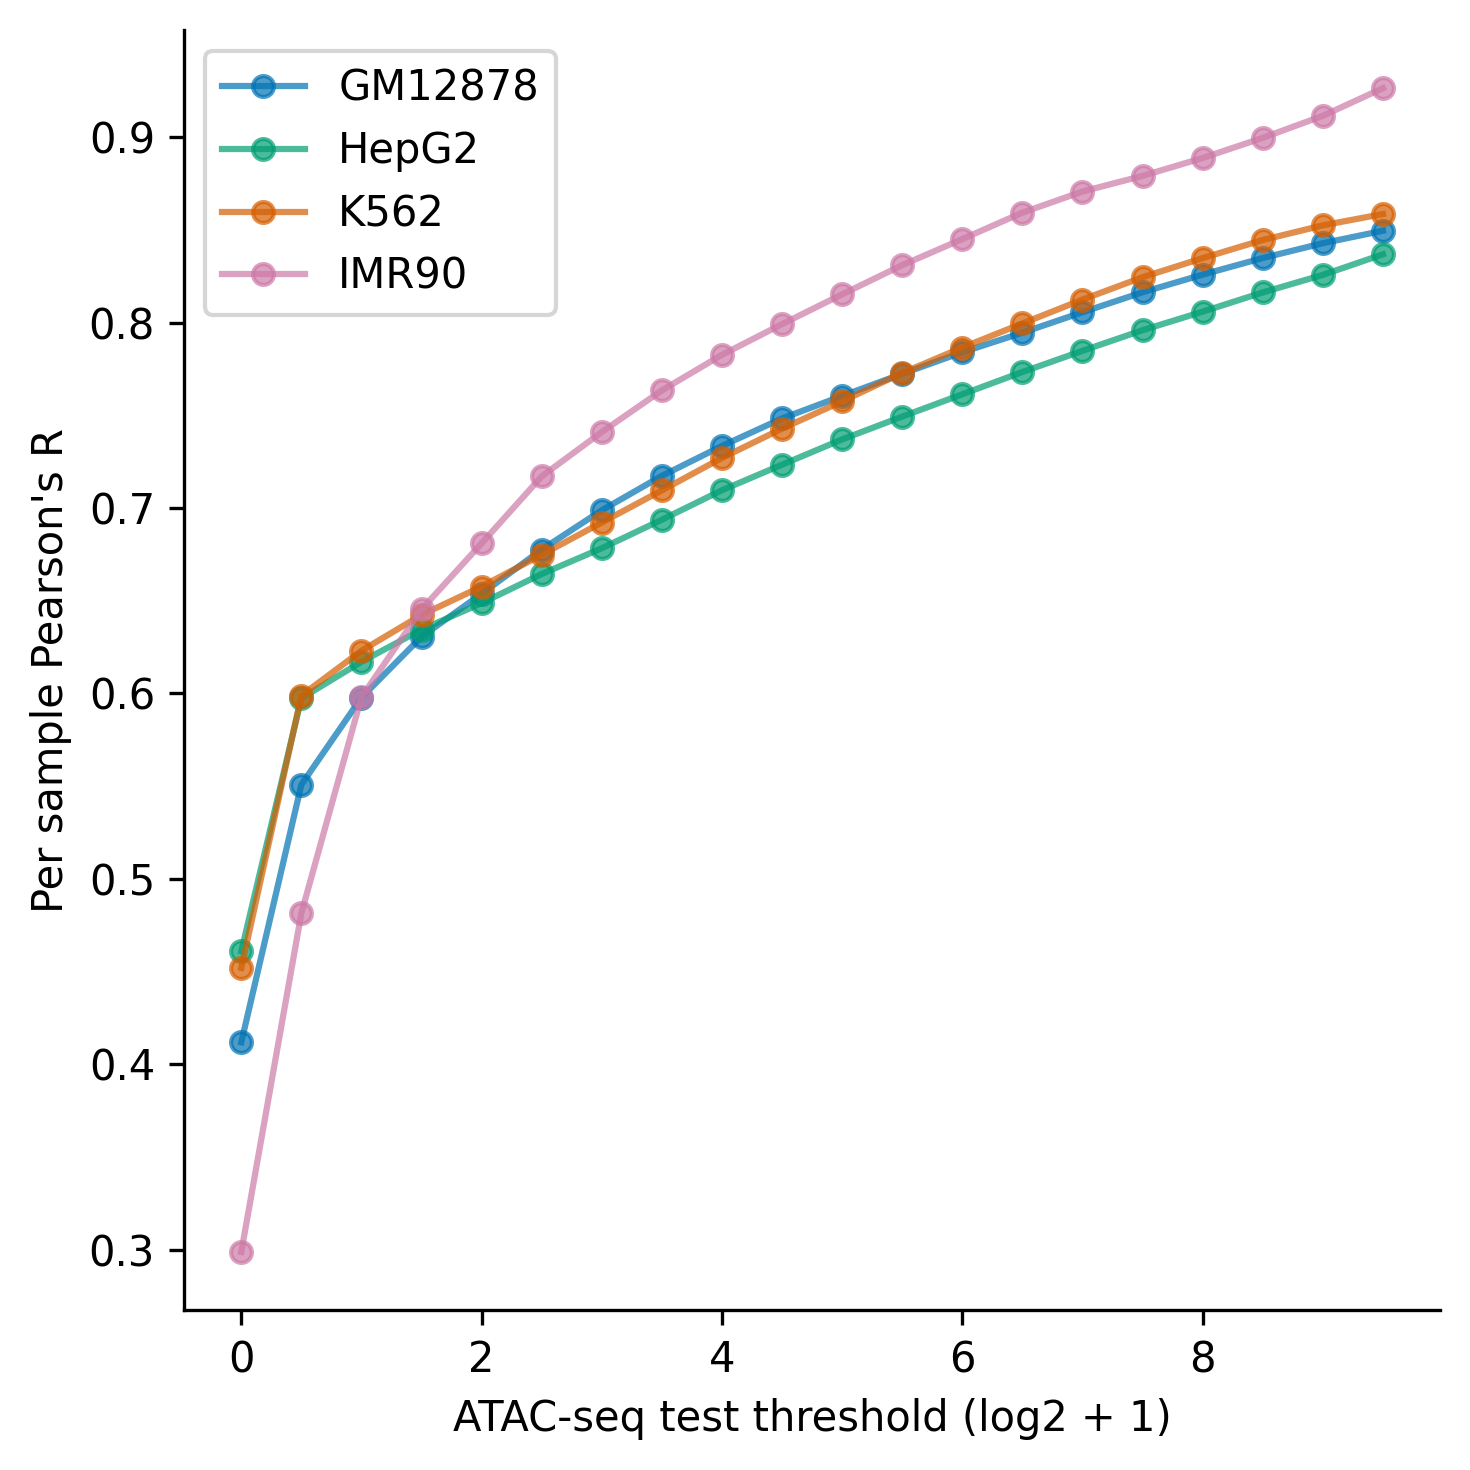

In [31]:
from matplotlib import style

style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

def plot_one_line(sample_wise_r, true_y, label: str, is_encode: bool = True):
    print(label)
    # different line style for ENCODE and TCGA
    line_style = '-' if is_encode else '--'

    thresholds = np.arange(0, 10, 0.5)
    rs = []
    for log_threshold in thresholds:
        idx = np.log2(true_y.max(axis=1) + 1) >= log_threshold
        rs.append(np.nanmean(sample_wise_r[idx]))

    ax.plot(thresholds, rs, linestyle=line_style, label=label, marker='.', alpha=0.7, markersize=10)

for name, [sample_r, true] in data.items():
    plot_one_line(sample_r, true, name)

ax.set_ylabel('Per sample Pearson\'s R')
ax.set_xlabel('ATAC-seq test threshold (log2 + 1)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.legend()

plt.savefig('fig1c.svg', format='svg')
plt.show()